<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Let's-use-our-Boston-Housing-Data-again!" data-toc-modified-id="Let's-use-our-Boston-Housing-Data-again!-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Let's use our Boston Housing Data again!</a></span></li><li><span><a href="#Perform-a-train-test-split" data-toc-modified-id="Perform-a-train-test-split-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Perform a train-test-split</a></span></li><li><span><a href="#Apply-your-model-to-the-train-set" data-toc-modified-id="Apply-your-model-to-the-train-set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Apply your model to the train set</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Importing-and-initializing-the-model-class" data-toc-modified-id="Importing-and-initializing-the-model-class-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Importing and initializing the model class</a></span></li><li><span><a href="#Fitting-the-model-to-the-train-data" data-toc-modified-id="Fitting-the-model-to-the-train-data-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Fitting the model to the train data</a></span></li><li><span><a href="#Calculating-predictions-on-the-train-set,-and-on-the-test-set" data-toc-modified-id="Calculating-predictions-on-the-train-set,-and-on-the-test-set-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>Calculating predictions on the train set, and on the test set</a></span></li><li><span><a href="#Calculating-your-residuals" data-toc-modified-id="Calculating-your-residuals-5.0.4"><span class="toc-item-num">5.0.4&nbsp;&nbsp;</span>Calculating your residuals</a></span></li><li><span><a href="#Calculating-the-Mean-Squared-Error" data-toc-modified-id="Calculating-the-Mean-Squared-Error-5.0.5"><span class="toc-item-num">5.0.5&nbsp;&nbsp;</span>Calculating the Mean Squared Error</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))
boston_features.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,0.542096,1.0,296.0,15.3,1.000000,-1.275260
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,0.623954,2.0,242.0,17.8,1.000000,-0.263711
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,0.623954,2.0,242.0,17.8,0.989737,-1.627858
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,0.707895,3.0,222.0,18.7,0.994276,-2.153192
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,0.707895,3.0,222.0,18.7,1.000000,-1.162114


C:\Users\ww\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


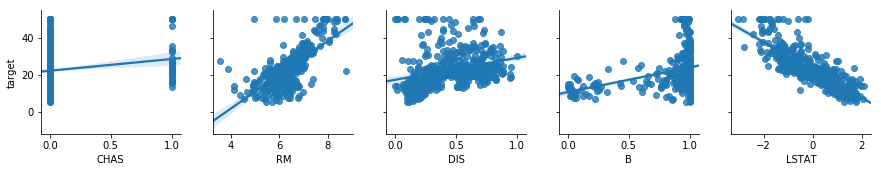

In [26]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target,columns = ["target"])
import seaborn as sns
X1 = pd.concat([y,X], axis=1)
sns.pairplot(X1, x_vars=['CHAS', 'RM', 'DIS', 'B', 'LSTAT'], y_vars=['target'], kind='reg')

## Perform a train-test-split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y)


## Apply your model to the train set

#### Importing and initializing the model class

In [28]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()



#### Fitting the model to the train data

In [30]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Calculating predictions on the train set, and on the test set

In [31]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#### Calculating your residuals

In [32]:
resid_train = y_train - y_hat_train
resid_test = y_test - y_hat_test

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [33]:
mse_train = np.sum((resid_train)**2) / len(resid_train)
mse_test = np.sum((resid_test)**2) / len(resid_test)
print(mse_train, mse_test)

target    21.339287
dtype: float64 target    23.573809
dtype: float64


If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

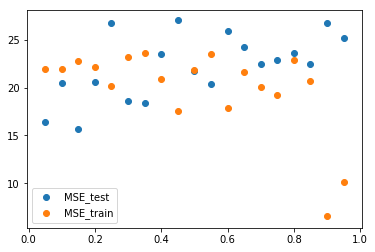

[target    21.988124
dtype: float64, target    21.905574
dtype: float64, target    22.806088
dtype: float64, target    22.189155
dtype: float64, target    20.173754
dtype: float64, target    23.228434
dtype: float64, target    23.620017
dtype: float64, target    20.951151
dtype: float64, target    17.582497
dtype: float64, target    21.882125
dtype: float64, target    23.564447
dtype: float64, target    17.853548
dtype: float64, target    21.58848
dtype: float64, target    20.077781
dtype: float64, target    19.24248
dtype: float64, target    22.861583
dtype: float64, target    20.649645
dtype: float64, target    6.557649
dtype: float64, target    10.159564
dtype: float64]


In [62]:
split_size = np.array((range(5,100,5))) / 100
train_errors = []
test_errors = []

for i in split_size:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = i)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    resid_train = y_train - y_hat_train
    resid_test = y_test - y_hat_test
    mse_train = np.sum((resid_train)**2) / len(resid_train)
    mse_test = np.sum((resid_test)**2) / len(resid_test)
    train_errors.append(mse_train)
    test_errors.append(mse_test)

plt.scatter(split_size, test_errors, label = 'MSE_test')
plt.scatter(split_size, train_errors, label = 'MSE_train')
plt.legend()
plt.show()
print(train_errors)

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

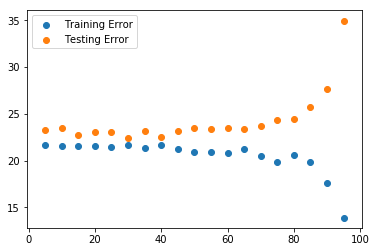

In [70]:
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

What's happening here? evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.